Import libraries

In [1]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
import sys
from sklearn.metrics import mean_squared_error
from pathlib import Path

# Get the parent directory
parent_dir = Path.cwd().parent.parent

# Ensure it's not already in sys.path
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))
from shared.metrics import print_evaluation_metrics
from shared.helpers import store_model
from shared.helpers import store_predictions_and_create_graph

Load dataset and prepare df

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "period"
target_column = "value"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column]]

df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
df = df.dropna()
dates = df.index.values

Train test split

In [3]:
data_length = len(df)
train_split = 0.9
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Param grid

In [4]:
# Generating all possible tuples for the first set
orders = [(x, 1, z) for x in [0, 1, 2] for z in [0, 1, 2]]

# Generating all possible tuples for the second set with fixed elements
seasonal_orders = [(x, 0, z, 12) for x in [1, 2, 3] for z in [1, 2, 3]]

Tune

In [7]:
results =  []
train_cv = train.iloc[:int(0.8*len(train))]
test_cv = train.iloc[int(0.8*len(train)):]
for order in orders:
    for seasonal_order in seasonal_orders:
        print(order, seasonal_order)
        try:
            model = SARIMAX(train_cv[target_column], order=order, seasonal_order=seasonal_order)
            model = model.fit()
            start = len(train_cv)
            end = len(train_cv) + len(test_cv) - 1
            pred = model.predict(start=start, end=end, typ="levels")
            mse = mean_squared_error(test_cv[target_column], pred)
            results.append((order, seasonal_order, mse))
        except Exception as e:
            print(e)
            continue

Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
(0, 1, 1) (3, 0, 2, 12)


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04183D+01    |proj g|=  2.72014D-01


 This problem is unconstrained.



At iterate    5    f=  1.03377D+01    |proj g|=  1.02355D-02

At iterate   10    f=  1.03323D+01    |proj g|=  4.45767D-03

At iterate   15    f=  1.03291D+01    |proj g|=  2.12304D-02

At iterate   20    f=  1.03274D+01    |proj g|=  2.68408D-04

At iterate   25    f=  1.03274D+01    |proj g|=  2.27253D-04

At iterate   30    f=  1.03273D+01    |proj g|=  3.05973D-03

At iterate   35    f=  1.03224D+01    |proj g|=  3.19145D-02
  ys=-1.153E+00  -gs= 4.463E-02 BFGS update SKIPPED



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.77435D-03    |proj g|=  9.75459D+02
LU decomposition error.
(0, 1, 1) (3, 0, 3, 12)


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04164D+01    |proj g|=  2.67142D-01


 This problem is unconstrained.



At iterate    5    f=  1.03432D+01    |proj g|=  2.80199D-02

At iterate   10    f=  1.03277D+01    |proj g|=  9.91032D-03

At iterate   15    f=  1.03273D+01    |proj g|=  3.42244D-03

At iterate   20    f=  1.03272D+01    |proj g|=  4.75695D-04

At iterate   25    f=  1.03272D+01    |proj g|=  2.16314D-04

At iterate   30    f=  1.03272D+01    |proj g|=  3.95381D-04

At iterate   35    f=  1.03271D+01    |proj g|=  2.45372D-03

At iterate   40    f=  1.03267D+01    |proj g|=  1.68892D-03

At iterate   45    f=  1.03265D+01    |proj g|=  4.17209D-04


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.03263D+01    |proj g|=  5.89077D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   5.891D-03   1.033D+01
  F =   10.326344139308890     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152)]
(0, 1, 2) (1, 0, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    5    f=  1.04075D+01    |proj g|=  6.78460D-02

At iterate   10    f=  1.03612D+01    |proj g|=  1.89169D-02

At iterate   15    f=  1.03509D+01    |proj g|=  2.23436D-02

At iterate   20    f=  1.03504D+01    |proj g|=  5.93792D-05

At iterate   25    f=  1.03504D+01    |proj g|=  1.74763D-03

At iterate   30    f=  1.03492D+01    |proj g|=  1.70379D-02

At iterate   35    f=  1.03376D+01    |proj g|=  1.77411D-02

At iterate   40    f=  1.03100D+01    |proj g|=  1.26652D-01

At iterate   45    f=  1.02974D+01    |proj g|=  1.98335D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     59   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801)]
(0, 1, 2) (1, 0, 2, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  1.03906D+01    |proj g|=  4.67769D-02

At iterate   10    f=  1.03509D+01    |proj g|=  1.94267D-02

At iterate   15    f=  1.03404D+01    |proj g|=  7.28614D-03

At iterate   20    f=  1.03396D+01    |proj g|=  3.68354D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   4.496D-05   1.034D+01
  F =   10.339645701264136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593)]
(0, 1, 2) (1, 0, 3, 12)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04789D+01    |proj g|=  2.19435D-01

At iterate    5    f=  1.03852D+01    |proj g|=  6.05888D-02

At iterate   10    f=  1.03350D+01    |proj g|=  1.79922D-02

At iterate   15    f=  1.03305D+01    |proj g|=  1.33252D-02

At iterate   20    f=  1.03288D+01    |proj g|=  2.15400D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     25      1     0     0   4.730D-05   1.033D+01
  F =   10.328836272764152     

CONVERG

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066)]
(0, 1, 2) (2, 0, 1, 12)
RUNNING THE L-BFGS-B COD

 This problem is unconstrained.



At iterate    5    f=  1.03642D+01    |proj g|=  3.80549D-02

At iterate   10    f=  1.03411D+01    |proj g|=  1.53681D-02

At iterate   15    f=  1.03349D+01    |proj g|=  2.68550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   4.603D-05   1.033D+01
  F =   10.334785535171871     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224)]


 This problem is unconstrained.



At iterate    5    f=  1.03005D+01    |proj g|=  1.22224D-02

At iterate   10    f=  1.02902D+01    |proj g|=  4.12545D-03

At iterate   15    f=  1.02848D+01    |proj g|=  9.27337D-03

At iterate   20    f=  1.02843D+01    |proj g|=  5.71253D-05

At iterate   25    f=  1.02843D+01    |proj g|=  2.94719D-04

At iterate   30    f=  1.02842D+01    |proj g|=  1.29384D-03

At iterate   35    f=  1.02817D+01    |proj g|=  1.01795D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     55      1     0     0   2.371D-02   1.026D+01
  F =   10.258535679555107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03014D+01    |proj g|=  1.36848D-02

At iterate   10    f=  1.02923D+01    |proj g|=  3.63928D-03

At iterate   15    f=  1.02874D+01    |proj g|=  2.16005D-02

At iterate   20    f=  1.02845D+01    |proj g|=  1.85225D-03

At iterate   25    f=  1.02843D+01    |proj g|=  5.34815D-04

At iterate   30    f=  1.02843D+01    |proj g|=  6.88130D-04

At iterate   35    f=  1.02840D+01    |proj g|=  7.26216D-03

At iterate   40    f=  1.02728D+01    |proj g|=  3.11613D-02

At iterate   45    f=  1.02570D+01    |proj g|=  5.86820D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     77   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03635D+01    |proj g|=  4.04678D-02

At iterate   10    f=  1.03310D+01    |proj g|=  1.74093D-02

At iterate   15    f=  1.03212D+01    |proj g|=  7.93492D-03

At iterate   20    f=  1.03203D+01    |proj g|=  6.06258D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     28      1     0     0   4.920D-05   1.032D+01
  F =   10.320265374341696     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04213D+01    |proj g|=  2.95719D-01

At iterate    5    f=  1.03010D+01    |proj g|=  1.27572D-02

At iterate   10    f=  1.02905D+01    |proj g|=  5.19160D-03

At iterate   15    f=  1.02876D+01    |proj g|=  8.13554D-03

At iterate   20    f=  1.02844D+01    |proj g|=  1.69615D-03

At iterate   25    f=  1.02843D+01    |proj g|=  9.79373D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     32      1     0     0   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04181D+01    |proj g|=  2.90857D-01

At iterate    5    f=  1.03038D+01    |proj g|=  1.86453D-02

At iterate   10    f=  1.02858D+01    |proj g|=  8.16462D-03

At iterate   15    f=  1.02843D+01    |proj g|=  2.66071D-03

At iterate   20    f=  1.02842D+01    |proj g|=  6.17429D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     23     26      1     0     0   5.717D-05   1.028D+01
  F =   10.284181856492902     

CONVERG

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.04064D+01    |proj g|=  1.06194D-01

At iterate   10    f=  1.03435D+01    |proj g|=  4.94279D-02

At iterate   15    f=  1.03360D+01    |proj g|=  4.53906D-03

At iterate   20    f=  1.03360D+01    |proj g|=  2.74680D-04

At iterate   25    f=  1.03353D+01    |proj g|=  8.22331D-04

At iterate   30    f=  1.03244D+01    |proj g|=  2.73055D-02

At iterate   35    f=  1.03124D+01    |proj g|=  6.32435D-03

At iterate   40    f=  1.03122D+01    |proj g|=  2.06271D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     50      1     0     0   2.063D-06   1.031D+01
  F =   10.3122317739

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03842D+01    |proj g|=  9.03014D-02

At iterate   10    f=  1.03252D+01    |proj g|=  2.94605D-02

At iterate   15    f=  1.03225D+01    |proj g|=  1.09613D-02

At iterate   20    f=  1.03221D+01    |proj g|=  3.56136D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   3.561D-05   1.032D+01
  F =   10.322132156285402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03934D+01    |proj g|=  4.15201D-02

At iterate   10    f=  1.03180D+01    |proj g|=  2.00876D-02

At iterate   15    f=  1.03109D+01    |proj g|=  1.21777D-02

At iterate   20    f=  1.03072D+01    |proj g|=  1.90365D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   3.909D-05   1.031D+01
  F =   10.307239418986702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03529D+01    |proj g|=  1.45451D-02

At iterate   10    f=  1.03197D+01    |proj g|=  5.14872D-02

At iterate   15    f=  1.03155D+01    |proj g|=  5.97447D-03

At iterate   20    f=  1.03152D+01    |proj g|=  3.72623D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   3.726D-05   1.032D+01
  F =   10.315177247341719     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04113D+01    |proj g|=  2.29878D-01

At iterate    5    f=  1.02709D+01    |proj g|=  1.39728D-02

At iterate   10    f=  1.02578D+01    |proj g|=  4.88963D-03

At iterate   15    f=  1.02518D+01    |proj g|=  4.64937D-03

At iterate   20    f=  1.02511D+01    |proj g|=  1.30917D-04

At iterate   25    f=  1.02511D+01    |proj g|=  2.12284D-04

At iterate   30    f=  1.02509D+01    |proj g|=  2.62593D-03

At iterate   35    f=  1.02415D+01    |proj g|=  4.77148D-02

At iterate   40    f=  1.02008D+01    |proj g|=  5.76874D-02

At iterate   45    f=  1.01796D+01    |proj g|=  1.62715D-02

At iterate   50    f=  1.01774D+01    |proj g|=  3.42376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02717D+01    |proj g|=  2.25831D-02

At iterate   10    f=  1.02590D+01    |proj g|=  1.07490D-02

At iterate   15    f=  1.02524D+01    |proj g|=  1.14288D-02

At iterate   20    f=  1.02511D+01    |proj g|=  2.24590D-03

At iterate   25    f=  1.02511D+01    |proj g|=  1.09774D-04

At iterate   30    f=  1.02510D+01    |proj g|=  2.91985D-03

At iterate   35    f=  1.02473D+01    |proj g|=  2.23208D-02
  ys=-1.017E-03  -gs= 1.330E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.02214D+01    |proj g|=  1.36365D-02

At iterate   45    f=  1.02149D+01    |proj g|=  3.25043D-03

At iterate   50    f=  1.02146D+01    |proj g|=  2.88535D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     86      2     1     0   2.885D-03   1.021D+01
  F =   10.214576260492345     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03517D+01    |proj g|=  2.24454D-02

At iterate   10    f=  1.03026D+01    |proj g|=  2.55000D-02

At iterate   15    f=  1.02972D+01    |proj g|=  1.81740D-02

At iterate   20    f=  1.02948D+01    |proj g|=  9.71398D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   4.204D-05   1.029D+01
  F =   10.294795491479590     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02710D+01    |proj g|=  1.48470D-02

At iterate   10    f=  1.02587D+01    |proj g|=  7.05986D-03

At iterate   15    f=  1.02557D+01    |proj g|=  1.74854D-02

At iterate   20    f=  1.02511D+01    |proj g|=  8.81749D-04

At iterate   25    f=  1.02511D+01    |proj g|=  3.98465D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     30      1     0     0   5.240D-05   1.025D+01
  F =   10.251053909609237     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04090D+01    |proj g|=  2.25963D-01

At iterate    5    f=  1.02752D+01    |proj g|=  1.37826D-02

At iterate   10    f=  1.02517D+01    |proj g|=  1.63465D-02

At iterate   15    f=  1.02511D+01    |proj g|=  4.79758D-03

At iterate   20    f=  1.02509D+01    |proj g|=  6.88638D-04

At iterate   25    f=  1.02509D+01    |proj g|=  1.05213D-04

At iterate   30    f=  1.02509D+01    |proj g|=  2.31682D-03

At iterate   35    f=  1.02507D+01    |proj g|=  8.85710D-04

At iterate   40    f=  1.02507D+01    |proj g|=  2.02718D-04

At iterate   45    f=  1.02507D+01    |proj g|=  3.79890D-04


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02506D+01    |proj g|=  1.48629D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56      1     0     0   1.486D-03   1.025D+01
  F =   10.250649981441388     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.04062D+01    |proj g|=  1.04154D-01

At iterate   10    f=  1.03473D+01    |proj g|=  2.24770D-02

At iterate   15    f=  1.03236D+01    |proj g|=  6.68112D-03

At iterate   20    f=  1.03230D+01    |proj g|=  1.12848D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   2.828D-05   1.032D+01
  F =   10.323015974776892     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03613D+01    |proj g|=  1.01142D-01

At iterate   10    f=  1.03285D+01    |proj g|=  1.89832D-02

At iterate   15    f=  1.03155D+01    |proj g|=  6.66564D-04

At iterate   20    f=  1.03152D+01    |proj g|=  3.10517D-04

At iterate   25    f=  1.03152D+01    |proj g|=  1.11883D-03

At iterate   30    f=  1.03148D+01    |proj g|=  1.86004D-03

At iterate   35    f=  1.03147D+01    |proj g|=  3.03272D-05

At iterate   40    f=  1.03147D+01    |proj g|=  1.10841D-03

At iterate   45    f=  1.03059D+01    |proj g|=  3.15167D-02


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02964D+01    |proj g|=  1.29593D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   1.296D-04   1.030D+01
  F =   10.296386248341747     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04226D+01    |proj g|=  1.45997D-01

At iterate    5    f=  1.03779D+01    |proj g|=  5.17210D-02

At iterate   10    f=  1.03125D+01    |proj g|=  5.01482D-02

At iterate   15    f=  1.03006D+01    |proj g|=  1.27521D-02

At iterate   20    f=  1.02954D+01    |proj g|=  4.46555D-03

At iterate   25    f=  1.02951D+01    |proj g|=  1.68671D-03

At iterate   30    f=  1.02950D+01    |proj g|=  3.50893D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03455D+01    |proj g|=  2.75825D-02

At iterate   10    f=  1.03048D+01    |proj g|=  1.66709D-02

At iterate   15    f=  1.02980D+01    |proj g|=  1.74692D-03

At iterate   20    f=  1.02979D+01    |proj g|=  1.45626D-03

At iterate   25    f=  1.02978D+01    |proj g|=  3.44674D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   3.446D-05   1.030D+01
  F =   10.297833120038611     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02514D+01    |proj g|=  1.92174D-02

At iterate   10    f=  1.02385D+01    |proj g|=  4.23028D-03

At iterate   15    f=  1.02378D+01    |proj g|=  1.92229D-03

At iterate   20    f=  1.02368D+01    |proj g|=  2.06663D-03

At iterate   25    f=  1.02361D+01    |proj g|=  8.27088D-04

At iterate   30    f=  1.02359D+01    |proj g|=  1.13531D-04

At iterate   35    f=  1.02359D+01    |proj g|=  2.37539D-04

At iterate   40    f=  1.02335D+01    |proj g|=  1.28076D-02
  ys=-7.464E-01  -gs= 4.525E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  1.01880D+01    |proj g|=  9.01014D-03

At iterate   50    f=  1.01852D+01    |proj g|=  2.09861D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     85      2     1     0   2.099D-03   1.019D+01
  F =   10.185188733159453     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03453D+01    |proj g|=  2.25369D-01

At iterate    5    f=  1.02616D+01    |proj g|=  2.11025D-02

At iterate   10    f=  1.02470D+01    |proj g|=  9.91072D-03

At iterate   15    f=  1.02378D+01    |proj g|=  1.35929D-02

At iterate   20    f=  1.02374D+01    |proj g|=  2.81465D-03

At iterate   25    f=  1.02372D+01    |proj g|=  1.54517D-03

At iterate   30    f=  1.02366D+01    |proj g|=  3.37437D-03

At iterate   35    f=  1.02359D+01    |proj g|=  8.46046D-04

At iterate   40    f=  1.02359D+01    |proj g|=  2.29086D-04

At iterate   45    f=  1.02359D+01    |proj g|=  9.69614D-05


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02359D+01    |proj g|=  4.30251D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     53      1     0     0   4.303D-04   1.024D+01
  F =   10.235887950512300     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03451D+01    |proj g|=  2.69221D-02

At iterate   10    f=  1.02973D+01    |proj g|=  3.20039D-02

At iterate   15    f=  1.02791D+01    |proj g|=  1.63721D-02

At iterate   20    f=  1.02770D+01    |proj g|=  1.96364D-03

At iterate   25    f=  1.02766D+01    |proj g|=  1.39255D-03

At iterate   30    f=  1.02764D+01    |proj g|=  9.75563D-04

At iterate   35    f=  1.02764D+01    |proj g|=  3.96557D-05

At iterate   40    f=  1.02764D+01    |proj g|=  4.53266D-04

At iterate   45    f=  1.02760D+01    |proj g|=  4.98496D-03


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02679D+01    |proj g|=  9.80566D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55      1     0     0   9.806D-02   1.027D+01
  F =   10.267904625329500     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02518D+01    |proj g|=  4.42437D-02

At iterate   10    f=  1.02448D+01    |proj g|=  6.60437D-03

At iterate   15    f=  1.02378D+01    |proj g|=  3.64895D-03

At iterate   20    f=  1.02377D+01    |proj g|=  1.00812D-03

At iterate   25    f=  1.02368D+01    |proj g|=  3.57035D-03

At iterate   30    f=  1.02363D+01    |proj g|=  2.85375D-03

At iterate   35    f=  1.02359D+01    |proj g|=  4.60957D-04

At iterate   40    f=  1.02359D+01    |proj g|=  8.31458D-05

At iterate   45    f=  1.02359D+01    |proj g|=  2.36451D-03

At iterate   50    f=  1.02347D+01    |proj g|=  8.77850D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02629D+01    |proj g|=  1.44639D-02

At iterate   10    f=  1.02385D+01    |proj g|=  4.92175D-03

At iterate   15    f=  1.02382D+01    |proj g|=  5.00644D-03

At iterate   20    f=  1.02373D+01    |proj g|=  7.63533D-03

At iterate   25    f=  1.02366D+01    |proj g|=  2.10188D-03

At iterate   30    f=  1.02359D+01    |proj g|=  1.63726D-03

At iterate   35    f=  1.02359D+01    |proj g|=  5.88793D-05

At iterate   40    f=  1.02359D+01    |proj g|=  3.00577D-04

At iterate   45    f=  1.02359D+01    |proj g|=  8.55949D-04


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02348D+01    |proj g|=  8.86024D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   8.860D-03   1.023D+01
  F =   10.234768436989985     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03872D+01    |proj g|=  1.14987D-01

At iterate   10    f=  1.03321D+01    |proj g|=  3.45118D-02

At iterate   15    f=  1.03075D+01    |proj g|=  6.06951D-03

At iterate   20    f=  1.03072D+01    |proj g|=  2.73510D-03

At iterate   25    f=  1.03072D+01    |proj g|=  2.62517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     28      1     0     0   2.625D-05   1.031D+01
  F =   10.307209296438092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03573D+01    |proj g|=  6.23078D-02

At iterate   10    f=  1.03220D+01    |proj g|=  3.08316D-02

At iterate   15    f=  1.03081D+01    |proj g|=  1.48954D-02

At iterate   20    f=  1.03068D+01    |proj g|=  6.97014D-04

At iterate   25    f=  1.03068D+01    |proj g|=  2.28771D-04
  ys=-7.157E+09  -gs= 7.425E-02 BFGS update SKIPPED
LU decomposition error.
(1, 1, 2) (1, 0, 3, 12)


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04008D+01    |proj g|=  1.25945D-01


 This problem is unconstrained.



At iterate    5    f=  1.03551D+01    |proj g|=  7.30826D-02

At iterate   10    f=  1.03046D+01    |proj g|=  3.36498D-02

At iterate   15    f=  1.02950D+01    |proj g|=  1.23897D-02

At iterate   20    f=  1.02899D+01    |proj g|=  4.04299D-03

At iterate   25    f=  1.02890D+01    |proj g|=  9.41557D-03

At iterate   30    f=  1.02889D+01    |proj g|=  3.34650D-04

At iterate   35    f=  1.02888D+01    |proj g|=  6.84080D-03

At iterate   40    f=  1.02885D+01    |proj g|=  3.52251D-03

At iterate   45    f=  1.02885D+01    |proj g|=  8.32506D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     53   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03219D+01    |proj g|=  3.50662D-02

At iterate   10    f=  1.03028D+01    |proj g|=  2.82999D-02

At iterate   15    f=  1.02980D+01    |proj g|=  3.95300D-03

At iterate   20    f=  1.02957D+01    |proj g|=  3.83835D-02

At iterate   25    f=  1.02902D+01    |proj g|=  7.66292D-03

At iterate   30    f=  1.02875D+01    |proj g|=  6.25400D-03

At iterate   35    f=  1.02874D+01    |proj g|=  3.12140D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     41      1     0     0   3.121D-05   1.029D+01
  F =   10.287445609269607     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02469D+01    |proj g|=  1.45310D-02

At iterate   10    f=  1.02309D+01    |proj g|=  5.51473D-03

At iterate   15    f=  1.02260D+01    |proj g|=  2.29051D-02

At iterate   20    f=  1.02244D+01    |proj g|=  5.60094D-03

At iterate   25    f=  1.02227D+01    |proj g|=  6.93937D-03

At iterate   30    f=  1.02220D+01    |proj g|=  2.95475D-03

At iterate   35    f=  1.02220D+01    |proj g|=  6.69383D-05

At iterate   40    f=  1.02220D+01    |proj g|=  3.00803D-04

At iterate   45    f=  1.02219D+01    |proj g|=  1.90636D-03


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02193D+01    |proj g|=  1.01768D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     51      1     0     0   1.018D-02   1.022D+01
  F =   10.219272474081061     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03400D+01    |proj g|=  3.03519D-01

At iterate    5    f=  1.02496D+01    |proj g|=  1.80837D-02

At iterate   10    f=  1.02324D+01    |proj g|=  2.23750D-02

At iterate   15    f=  1.02270D+01    |proj g|=  1.77888D-02

At iterate   20    f=  1.02248D+01    |proj g|=  2.03363D-03

At iterate   25    f=  1.02238D+01    |proj g|=  3.43097D-03

At iterate   30    f=  1.02222D+01    |proj g|=  5.04832D-03

At iterate   35    f=  1.02220D+01    |proj g|=  6.58233D-04

At iterate   40    f=  1.02220D+01    |proj g|=  2.08819D-04

At iterate   45    f=  1.02220D+01    |proj g|=  1.06540D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03366D+01    |proj g|=  1.79958D-02

At iterate   10    f=  1.03014D+01    |proj g|=  3.59761D-02

At iterate   15    f=  1.02782D+01    |proj g|=  1.82426D-02

At iterate   20    f=  1.02751D+01    |proj g|=  5.09090D-04

At iterate   25    f=  1.02749D+01    |proj g|=  6.44173D-03

At iterate   30    f=  1.02721D+01    |proj g|=  3.89500D-02

At iterate   35    f=  1.02692D+01    |proj g|=  2.71342D-03

At iterate   40    f=  1.02692D+01    |proj g|=  7.08809D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     50      1     0     0   3.576D-05   1.027D+01
  F =   10.2692021217

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02473D+01    |proj g|=  1.51832D-02

At iterate   10    f=  1.02307D+01    |proj g|=  7.53916D-03

At iterate   15    f=  1.02274D+01    |proj g|=  1.07714D-02

At iterate   20    f=  1.02247D+01    |proj g|=  6.28816D-03

At iterate   25    f=  1.02238D+01    |proj g|=  5.68773D-03

At iterate   30    f=  1.02220D+01    |proj g|=  1.88451D-03

At iterate   35    f=  1.02220D+01    |proj g|=  2.58314D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     38     40      1     0     0   4.764D-05   1.022D+01
  F =   10.221978421838129     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02518D+01    |proj g|=  1.65849D-02

At iterate   10    f=  1.02241D+01    |proj g|=  2.65015D-02

At iterate   15    f=  1.02221D+01    |proj g|=  5.63331D-03

At iterate   20    f=  1.02219D+01    |proj g|=  1.94852D-03

At iterate   25    f=  1.02219D+01    |proj g|=  9.60554D-05

At iterate   30    f=  1.02219D+01    |proj g|=  4.74722D-05

At iterate   35    f=  1.02219D+01    |proj g|=  6.37219D-04

At iterate   40    f=  1.02218D+01    |proj g|=  4.59544D-03

At iterate   45    f=  1.02216D+01    |proj g|=  8.44645D-04


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02216D+01    |proj g|=  6.81304D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   6.813D-04   1.022D+01
  F =   10.221582709210411     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03848D+01    |proj g|=  4.35832D-02

At iterate   10    f=  1.03225D+01    |proj g|=  2.45335D-02

At iterate   15    f=  1.03137D+01    |proj g|=  3.05089D-03

At iterate   20    f=  1.03132D+01    |proj g|=  1.53005D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   1.530D-04   1.031D+01
  F =   10.313220570733078     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04024D+01    |proj g|=  8.82882D-02

At iterate    5    f=  1.03510D+01    |proj g|=  1.55326D-01

At iterate   10    f=  1.03022D+01    |proj g|=  7.20163D-03

At iterate   15    f=  1.02998D+01    |proj g|=  2.04472D-02

At iterate   20    f=  1.02991D+01    |proj g|=  1.46098D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     27      1     0     0   3.099D-05   1.030D+01
  F =   10.299081929984599     

CONVERG

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03675D+01    |proj g|=  4.07831D-02

At iterate   10    f=  1.03237D+01    |proj g|=  1.13375D-01

At iterate   15    f=  1.02880D+01    |proj g|=  7.18886D-03

At iterate   20    f=  1.02859D+01    |proj g|=  9.23962D-03

At iterate   25    f=  1.02855D+01    |proj g|=  6.72653D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     32      1     0     0   4.948D-05   1.029D+01
  F =   10.285501492905011     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03355D+01    |proj g|=  2.53127D-02

At iterate   10    f=  1.02976D+01    |proj g|=  2.96792D-02

At iterate   15    f=  1.02939D+01    |proj g|=  6.30915D-03

At iterate   20    f=  1.02928D+01    |proj g|=  4.02494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     25      1     0     0   3.254D-05   1.029D+01
  F =   10.292845241900730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02492D+01    |proj g|=  1.81424D-02

At iterate   10    f=  1.02368D+01    |proj g|=  5.57922D-03

At iterate   15    f=  1.02308D+01    |proj g|=  1.65033D-02

At iterate   20    f=  1.02286D+01    |proj g|=  1.96794D-04

At iterate   25    f=  1.02286D+01    |proj g|=  1.60301D-04

At iterate   30    f=  1.02285D+01    |proj g|=  3.84825D-03

At iterate   35    f=  1.02207D+01    |proj g|=  4.68320D-02

At iterate   40    f=  1.01792D+01    |proj g|=  9.62960D-03

At iterate   45    f=  1.01761D+01    |proj g|=  2.07567D-02

At iterate   50    f=  1.01745D+01    |proj g|=  4.79260D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02513D+01    |proj g|=  1.34513D-02

At iterate   10    f=  1.02383D+01    |proj g|=  4.23612D-03

At iterate   15    f=  1.02314D+01    |proj g|=  2.36163D-02

At iterate   20    f=  1.02286D+01    |proj g|=  3.91547D-03

At iterate   25    f=  1.02286D+01    |proj g|=  4.84675D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     31      1     0     0   4.847D-05   1.023D+01
  F =   10.228603010010179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03355D+01    |proj g|=  2.47439D-02

At iterate   10    f=  1.02870D+01    |proj g|=  3.84703D-02

At iterate   15    f=  1.02776D+01    |proj g|=  2.38538D-02

At iterate   20    f=  1.02747D+01    |proj g|=  1.43775D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     28      1     0     0   3.702D-05   1.027D+01
  F =   10.274670117316312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03521D+01    |proj g|=  1.30193D-01

At iterate    5    f=  1.02497D+01    |proj g|=  1.40906D-02

At iterate   10    f=  1.02375D+01    |proj g|=  1.80950D-02

At iterate   15    f=  1.02346D+01    |proj g|=  1.36652D-02

At iterate   20    f=  1.02288D+01    |proj g|=  3.99371D-03

At iterate   25    f=  1.02286D+01    |proj g|=  2.39017D-03

At iterate   30    f=  1.02286D+01    |proj g|=  4.84647D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03495D+01    |proj g|=  1.30140D-01

At iterate    5    f=  1.02530D+01    |proj g|=  2.43073D-02

At iterate   10    f=  1.02369D+01    |proj g|=  3.76683D-02

At iterate   15    f=  1.02291D+01    |proj g|=  5.17784D-03

At iterate   20    f=  1.02285D+01    |proj g|=  5.96391D-04

At iterate   25    f=  1.02285D+01    |proj g|=  8.69811D-05

At iterate   30    f=  1.02285D+01    |proj g|=  1.07819D-04

At iterate   35    f=  1.02285D+01    |proj g|=  1.12223D-03

At iterate   40    f=  1.02284D+01    |proj g|=  1.45314D-03

At iterate   45    f=  1.02283D+01    |proj g|=  3.92183D-04


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02283D+01    |proj g|=  2.87163D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   2.872D-04   1.023D+01
  F =   10.228328855025735     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03924D+01    |proj g|=  3.14426D-02

At iterate   10    f=  1.03205D+01    |proj g|=  1.34346D-02

At iterate   15    f=  1.03158D+01    |proj g|=  1.73682D-02

At iterate   20    f=  1.03134D+01    |proj g|=  4.76906D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   2.062D-04   1.031D+01
  F =   10.313181434184422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03654D+01    |proj g|=  5.82698D-02

At iterate   10    f=  1.03067D+01    |proj g|=  2.78776D-02

At iterate   15    f=  1.03009D+01    |proj g|=  1.31459D-02

At iterate   20    f=  1.02991D+01    |proj g|=  6.60069D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   1.297D-04   1.030D+01
  F =   10.299026701659200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04106D+01    |proj g|=  1.25787D-01

At iterate    5    f=  1.03633D+01    |proj g|=  3.98080D-02

At iterate   10    f=  1.02944D+01    |proj g|=  2.15785D-02

At iterate   15    f=  1.02882D+01    |proj g|=  6.91752D-03

At iterate   20    f=  1.02854D+01    |proj g|=  3.25457D-03

At iterate   25    f=  1.02853D+01    |proj g|=  2.98089D-03

At iterate   30    f=  1.02853D+01    |proj g|=  7.09809D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03346D+01    |proj g|=  2.10505D-02

At iterate   10    f=  1.02952D+01    |proj g|=  6.88137D-03

At iterate   15    f=  1.02930D+01    |proj g|=  4.43132D-03

At iterate   20    f=  1.02926D+01    |proj g|=  1.63075D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   5.802D-05   1.029D+01
  F =   10.292622236742163     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02481D+01    |proj g|=  1.63695D-02

At iterate   10    f=  1.02354D+01    |proj g|=  5.91574D-03

At iterate   15    f=  1.02301D+01    |proj g|=  1.20810D-02

At iterate   20    f=  1.02276D+01    |proj g|=  4.81183D-04

At iterate   25    f=  1.02276D+01    |proj g|=  1.72366D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     32      1     0     0   5.966D-05   1.023D+01
  F =   10.227567236073755     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02503D+01    |proj g|=  1.67849D-02

At iterate   10    f=  1.02377D+01    |proj g|=  6.52621D-03

At iterate   15    f=  1.02334D+01    |proj g|=  1.98899D-02

At iterate   20    f=  1.02277D+01    |proj g|=  6.03223D-03

At iterate   25    f=  1.02276D+01    |proj g|=  1.97270D-03

At iterate   30    f=  1.02276D+01    |proj g|=  4.87074D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     38      1     0     0   4.873D-05   1.023D+01
  F =   10.227567164353468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04587D+01    |proj g|=  3.36058D-01

At iterate    5    f=  1.03334D+01    |proj g|=  2.32546D-02

At iterate   10    f=  1.02799D+01    |proj g|=  1.52855D-02

At iterate   15    f=  1.02767D+01    |proj g|=  1.97997D-02

At iterate   20    f=  1.02741D+01    |proj g|=  9.29670D-04

At iterate   25    f=  1.02741D+01    |proj g|=  1.01407D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     32      1     0     0   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02468D+01    |proj g|=  1.22697D-02

At iterate   10    f=  1.02351D+01    |proj g|=  4.18965D-03

At iterate   15    f=  1.02313D+01    |proj g|=  2.41385D-02

At iterate   20    f=  1.02277D+01    |proj g|=  1.70559D-03

At iterate   25    f=  1.02276D+01    |proj g|=  4.10716D-04

At iterate   30    f=  1.02276D+01    |proj g|=  9.82373D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     37      1     0     0   1.677D-04   1.023D+01
  F =   10.227566886068697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03521D+01    |proj g|=  2.63680D-01

At iterate    5    f=  1.02541D+01    |proj g|=  1.61714D-02

At iterate   10    f=  1.02289D+01    |proj g|=  1.96866D-02

At iterate   15    f=  1.02277D+01    |proj g|=  3.98825D-03

At iterate   20    f=  1.02275D+01    |proj g|=  1.26246D-03

At iterate   25    f=  1.02275D+01    |proj g|=  3.82218D-04

At iterate   30    f=  1.02275D+01    |proj g|=  7.08548D-05

At iterate   35    f=  1.02275D+01    |proj g|=  7.15912D-04

At iterate   40    f=  1.02274D+01    |proj g|=  1.81098D-03

At iterate   45    f=  1.02272D+01    |proj g|=  2.02278D-03


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02271D+01    |proj g|=  7.84528D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56      1     0     0   7.845D-04   1.023D+01
  F =   10.227145104833145     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03517D+01    |proj g|=  8.85075D-02

At iterate   10    f=  1.02546D+01    |proj g|=  1.18512D-01

At iterate   15    f=  1.02499D+01    |proj g|=  7.01629D-02

At iterate   20    f=  1.02442D+01    |proj g|=  1.40330D-02

At iterate   25    f=  1.02371D+01    |proj g|=  2.33380D-02

At iterate   30    f=  1.02323D+01    |proj g|=  1.13296D-01

At iterate   35    f=  1.02311D+01    |proj g|=  3.44768D-03

At iterate   40    f=  1.02311D+01    |proj g|=  5.66571D-03

At iterate   45    f=  1.02310D+01    |proj g|=  4.39034D-02

At iterate   50    f=  1.02297D+01    |proj g|=  4.64304D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03456D+01    |proj g|=  6.00784D-02

At iterate   10    f=  1.03155D+01    |proj g|=  1.07508D-01

At iterate   15    f=  1.02747D+01    |proj g|=  1.52554D-01

At iterate   20    f=  1.02405D+01    |proj g|=  6.36958D-02

At iterate   25    f=  1.02359D+01    |proj g|=  1.73562D-02

At iterate   30    f=  1.02343D+01    |proj g|=  2.95012D-02

At iterate   35    f=  1.02331D+01    |proj g|=  5.48422D-03

At iterate   40    f=  1.02328D+01    |proj g|=  1.26818D-02

At iterate   45    f=  1.02291D+01    |proj g|=  5.56252D-02


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02267D+01    |proj g|=  4.80558D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   4.806D-02   1.023D+01
  F =   10.226747647394506     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03922D+01    |proj g|=  1.40128D-01

At iterate    5    f=  1.03431D+01    |proj g|=  4.23245D-02

At iterate   10    f=  1.02895D+01    |proj g|=  3.56800D-02

At iterate   15    f=  1.02788D+01    |proj g|=  8.65230D-03

At iterate   20    f=  1.02777D+01    |proj g|=  3.25617D-03

At iterate   25    f=  1.02748D+01    |proj g|=  6.53711D-03

At iterate   30    f=  1.02746D+01    |proj g|=  1.62000D-02

At iterate   35    f=  1.02674D+01    |proj g|=  3.55579D-02

At iterate   40    f=  1.02652D+01    |proj g|=  1.82723D-02

At iterate   45    f=  1.02526D+01    |proj g|=  1.14187D-01


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02441D+01    |proj g|=  2.52716D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     72      1     0     0   2.527D-02   1.024D+01
  F =   10.244142724429311     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03323D+01    |proj g|=  2.77447D-02

At iterate   10    f=  1.03085D+01    |proj g|=  4.07027D-02

At iterate   15    f=  1.03010D+01    |proj g|=  4.53806D-02

At iterate   20    f=  1.02922D+01    |proj g|=  5.16353D-02

At iterate   25    f=  1.02910D+01    |proj g|=  2.63821D-03

At iterate   30    f=  1.02908D+01    |proj g|=  1.55739D-02

At iterate   35    f=  1.02907D+01    |proj g|=  2.95967D-03

At iterate   40    f=  1.02907D+01    |proj g|=  8.28055D-03

At iterate   45    f=  1.02853D+01    |proj g|=  5.84736D-02

At iterate   50    f=  1.02818D+01    |proj g|=  2.31578D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02455D+01    |proj g|=  1.48597D-02

At iterate   10    f=  1.02290D+01    |proj g|=  6.26896D-03

At iterate   15    f=  1.02244D+01    |proj g|=  1.16095D-02

At iterate   20    f=  1.02221D+01    |proj g|=  4.51040D-03

At iterate   25    f=  1.02204D+01    |proj g|=  5.26251D-03

At iterate   30    f=  1.02199D+01    |proj g|=  1.39370D-03

At iterate   35    f=  1.02198D+01    |proj g|=  5.62776D-04

At iterate   40    f=  1.02198D+01    |proj g|=  4.74623D-05

At iterate   45    f=  1.02198D+01    |proj g|=  2.06881D-04

At iterate   50    f=  1.02198D+01    |proj g|=  7.27954D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02482D+01    |proj g|=  1.58828D-02

At iterate   10    f=  1.02309D+01    |proj g|=  1.04781D-02

At iterate   15    f=  1.02270D+01    |proj g|=  1.19906D-02

At iterate   20    f=  1.02239D+01    |proj g|=  1.03933D-02

At iterate   25    f=  1.02227D+01    |proj g|=  1.20025D-02

At iterate   30    f=  1.02208D+01    |proj g|=  3.32200D-03

At iterate   35    f=  1.02198D+01    |proj g|=  1.23431D-03

At iterate   40    f=  1.02198D+01    |proj g|=  1.29254D-04

At iterate   45    f=  1.02198D+01    |proj g|=  9.10706D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     53   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.03337D+01    |proj g|=  1.79594D-02

At iterate   10    f=  1.03027D+01    |proj g|=  4.11991D-02

At iterate   15    f=  1.02909D+01    |proj g|=  8.43014D-02

At iterate   20    f=  1.02799D+01    |proj g|=  4.71068D-02

At iterate   25    f=  1.02717D+01    |proj g|=  6.12976D-02

At iterate   30    f=  1.02714D+01    |proj g|=  5.94447D-04

At iterate   35    f=  1.02713D+01    |proj g|=  1.68430D-03

At iterate   40    f=  1.02713D+01    |proj g|=  2.09781D-03

At iterate   45    f=  1.02713D+01    |proj g|=  3.63812D-04


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.02713D+01    |proj g|=  7.12877D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60      1     0     0   7.129D-03   1.027D+01
  F =   10.271277782844059     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02463D+01    |proj g|=  1.46139D-02

At iterate   10    f=  1.02288D+01    |proj g|=  1.02277D-02

At iterate   15    f=  1.02260D+01    |proj g|=  6.80152D-03

At iterate   20    f=  1.02221D+01    |proj g|=  2.30435D-02

At iterate   25    f=  1.02214D+01    |proj g|=  1.17434D-02

At iterate   30    f=  1.02201D+01    |proj g|=  1.08509D-02

At iterate   35    f=  1.02199D+01    |proj g|=  7.76567D-04

At iterate   40    f=  1.02198D+01    |proj g|=  5.22113D-04

At iterate   45    f=  1.02198D+01    |proj g|=  4.74641D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     46     52   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


[[[0, 1, 0], [1, 0, 1, 12], 1229838344.886935], [[0, 1, 0], [1, 0, 2, 12], 1193324512.5706918], [[0, 1, 0], [1, 0, 3, 12], 1248326789.132243], [[0, 1, 0], [2, 0, 1, 12], 1196978279.8110282], [[0, 1, 0], [2, 0, 2, 12], 7315401039.812695], [[0, 1, 0], [2, 0, 3, 12], 7340870712.788102], [[0, 1, 0], [3, 0, 1, 12], 1464441041.2690895], [[0, 1, 0], [3, 0, 2, 12], 7345172068.096147], [[0, 1, 0], [3, 0, 3, 12], 7443662318.743983], [[0, 1, 1], [1, 0, 1, 12], 1207796181.1125474], [[0, 1, 1], [1, 0, 2, 12], 1182692909.081394], [[0, 1, 1], [1, 0, 3, 12], 1244964213.6793568], [[0, 1, 1], [2, 0, 1, 12], 1191606020.3291624], [[0, 1, 1], [2, 0, 2, 12], 7848359299.985327], [[0, 1, 1], [2, 0, 3, 12], 6.19496451857879e+17], [[0, 1, 1], [3, 0, 1, 12], 1513673928.375732], ((0, 1, 1), (3, 0, 3, 12), 7772050587.849152), ((0, 1, 2), (1, 0, 1, 12), 1147505154.808801), ((0, 1, 2), (1, 0, 2, 12), 1132523874.6495593), ((0, 1, 2), (1, 0, 3, 12), 1186791980.1622066), ((0, 1, 2), (2, 0, 1, 12), 1141991652.2758224), 

 This problem is unconstrained.



At iterate    5    f=  1.02501D+01    |proj g|=  1.54685D-02

At iterate   10    f=  1.02225D+01    |proj g|=  4.59171D-02

At iterate   15    f=  1.02204D+01    |proj g|=  6.28030D-03

At iterate   20    f=  1.02199D+01    |proj g|=  1.89807D-03

At iterate   25    f=  1.02198D+01    |proj g|=  8.73958D-04

At iterate   30    f=  1.02198D+01    |proj g|=  8.59650D-04

At iterate   35    f=  1.02198D+01    |proj g|=  1.01036D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     35     40      1     0     0   1.010D-04   1.022D+01
  F =   10.219753165111898     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [8]:
best_order, best_seasonal_order, _ = min(results, key=lambda x: x[2])

Best option

In [9]:
print(best_order)
print(best_seasonal_order)

(1, 1, 1)
(2, 0, 2, 12)


Create Model

In [10]:
model = SARIMAX(
    train[target_column], order=best_order, seasonal_order=best_seasonal_order
)
model = model.fit()
model.summary()

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03492D+01    |proj g|=  2.29267D-01


 This problem is unconstrained.



At iterate    5    f=  1.02641D+01    |proj g|=  9.41072D-03

At iterate   10    f=  1.02524D+01    |proj g|=  1.01051D-02

At iterate   15    f=  1.02501D+01    |proj g|=  1.34695D-03

At iterate   20    f=  1.02491D+01    |proj g|=  1.17547D-03

At iterate   25    f=  1.02486D+01    |proj g|=  1.81736D-03

At iterate   30    f=  1.02483D+01    |proj g|=  3.77585D-04

At iterate   35    f=  1.02483D+01    |proj g|=  2.25953D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     49      1     0     0   6.343D-05   1.025D+01
  F =   10.248294099818478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   value   No. Observations:                10320
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood             -105762.395
Date:                                 Wed, 01 May 2024   AIC                         211538.790
Time:                                         21:04:00   BIC                         211589.482
Sample:                                     01-02-2023   HQIC                        211555.922
                                          - 03-07-2024                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9671      0.003    290.857      0.000       0.961       0.974
ma.L1         -0.9962      0.002   -584.246      0.000      -0.999      -0.993
ar.S.L12       0.0015      0.001      2.865      0.004       0.000       0.002
ar.S.L24       0.9919      0.001    836.862      0.000       0.990       0.994
ma.S.L12      -0.0170      0.001    -15.562      0.000      -0.019      -0.015
ma.S.L24      -0.9238      0.005   -174.538      0.000      -0.934      -0.913
sigma2      7.005e+07   1.68e-11   4.18e+18      0.000    7.01e+07    7.01e+07
===================================================================================
Ljung-Box (L1) (Q):                  61.11   Jarque-Bera (JB):           5757580.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             2.67
Prob(H) (two-sided):                  0.00   Kurtosis:                       118.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.79e+32. Standard errors may be unstable.
"""

Predict

In [5]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ="levels")

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [6]:
non_zero = []
 
for i in pred:
    removed_initial_one = i-1
    if removed_initial_one == 0:
        non_zero.append(removed_initial_one+sys.float_info.min)
    else:
        non_zero.append(removed_initial_one)

Plot the result

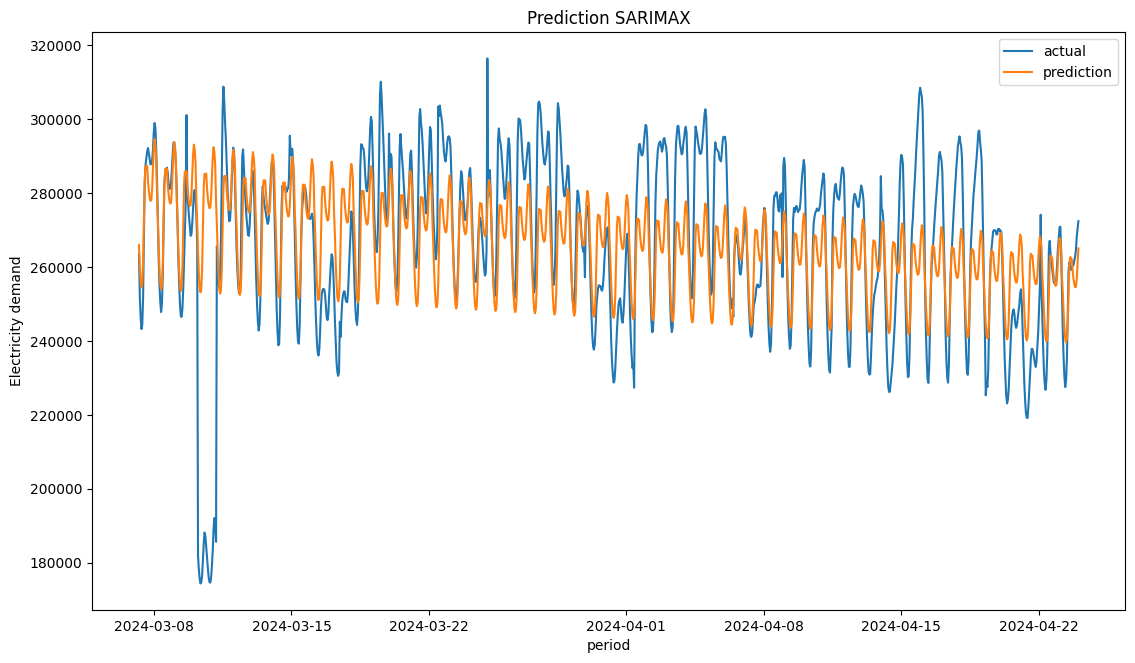

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(pd.to_datetime(dates[int(data_length*train_split):]), (test[target_column]-1).values, label="actual")
ax.plot(pd.to_datetime(dates[int(data_length*train_split):]), list(pred), label="prediction")
ax.set_title("Prediction SARIMAX")
ax.set_ylabel("Electricity demand")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

Metrics

In [8]:
print_evaluation_metrics(non_zero, test[target_column]-1, train[target_column]-1)

Evaluation Metrics:
MSE: 396876948.35
RMSE: 19921.77
MAE: 13563.90
MAPE: 5.36
SMAPE: 5.18
MASE: 1.85


Store model

In [9]:
store_model(model, "sarima")

Store results and depict them on graph

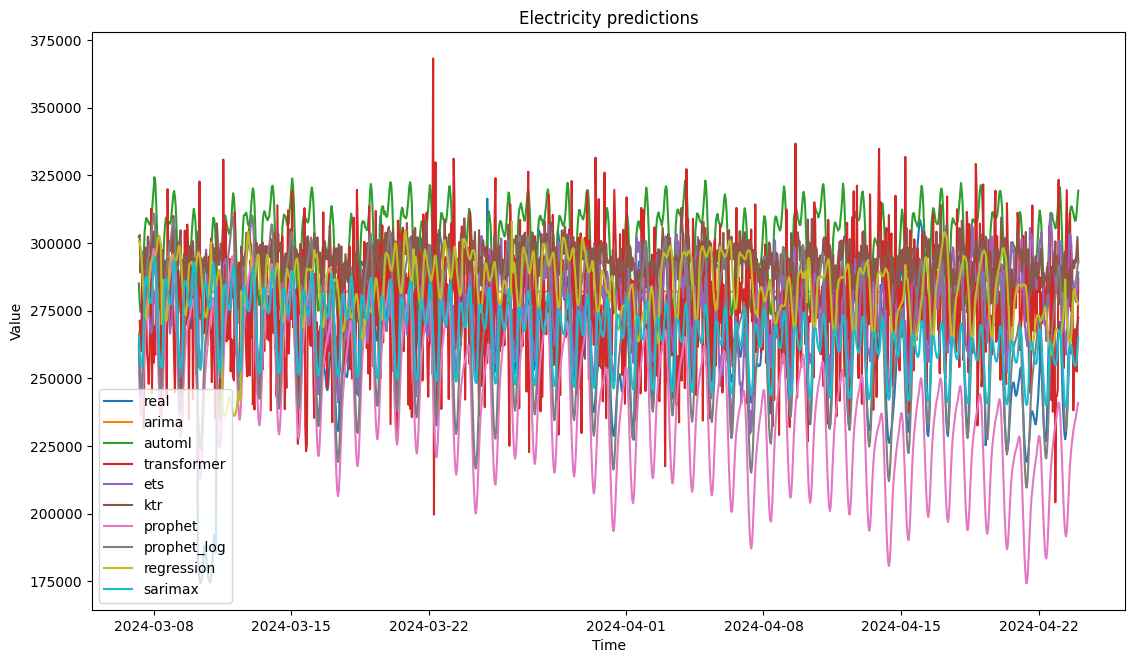

In [11]:
store_predictions_and_create_graph("sarimax", dates[int(data_length*train_split):], non_zero, test[target_column]-1, "Electricity")